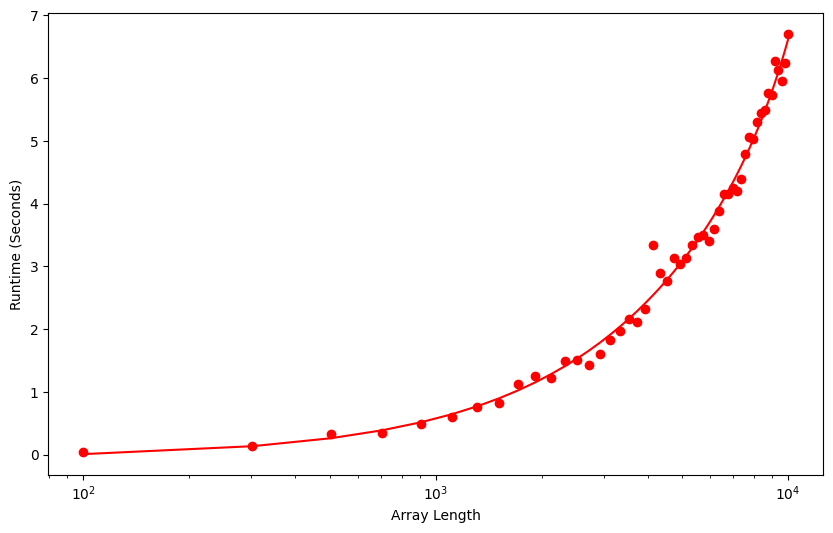

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
import random

plt.rcParams['figure.figsize'] = [10, 6] # set size of plot

def merge(A1: list, A2: list):
    i = j = k = 0
    A = [0] * (len(A1) + len(A2))
    while i < len(A1) and j < len(A2):
        if A1[i] <= A2[j]:
            A[k] = A1[i]
            i += 1
            k += 1
        elif A2[j] <= A1[i]:
            A[k] = A2[j]
            j += 1
            k += 1
    while i < len(A1):
        A[k] = A1[i]
        k += 1
        i += 1
    while j < len(A2):
        A[k] = A2[j]
        k += 1
        j += 1
    return A

def mergesort(A: list):
    '''
    :param A: array to be sorted
    :return: sorted array
    '''
    l = 1
    while l < len(A):
        i = 0
        while i < len(A):
            l1 = i
            r1 = i + l - 1
            l2 = i + l
            r2 = i + 2 * l - 1
            if l2 >= len(A):
                break
            if r2 >= len(A):
                r2 = len(A) - 1
            temp = merge(A[l1:r1 + 1], A[l2:r2 + 1])
            for j in range(0, r2 - l1 + 1):
                A[i + j] = temp[j]
            i = i + 2 * l
        l = 2 * l
    return A

ns = np.linspace(100, 10_000, 50, dtype=int)

# red plots
ts = [timeit.timeit('mergesort(lst)',
                    setup='lst=list(range({})); random.shuffle(lst)'.format(n),
                    globals=globals(),
                    number=100)
      for n in ns]

plt.xlabel('Array Length')
plt.ylabel('Runtime (Seconds)')
plt.semilogx(ns, ts, 'or')

# line of best fit for red plots
degree = 4
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.semilogx(ns, [p(n) for n in ns], '-r')


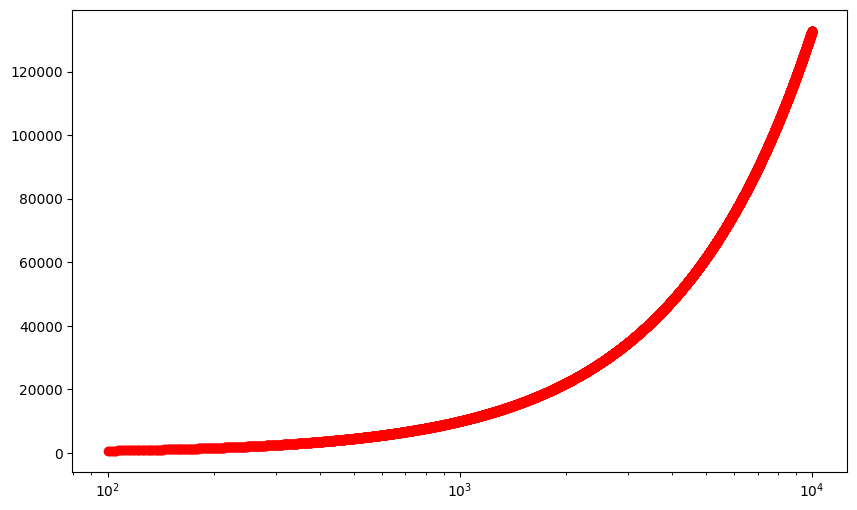

In [9]:
import math

# y = xlog x
# vertically stretched 1000x
ns = range(100, 10000)
ts = [n* math.log(n, 2) for n in ns]
plt.semilogx(ns, ts, 'or');